# Haberman Dataset


# Objective

#### 1. Load the Haberman dataset into Dataframe.
#### 2. Find the number of points, numer of features, number of classes, data-points per class.

In [2]:
import pandas as pd
#'hbd' IS THE DATAFRAME OF 'HABERMAN DATASET'
hbd=pd.read_csv(r"C:\Users\akash\Downloads\haberman.csv")
#PRINT INITIAL 20 ENTREIS
hbd.head(20)

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


Total number of data-points and features

In [3]:
# PRINT THE SHAPE OF DATASET
print(hbd.shape)

(306, 4)


Column names in our dataset

In [100]:
# PRINT ALL THE COLUMNS
hbd.columns

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')

Data-points per class

In [110]:
# PRINT ALL THE SAME VALUE COUNT IN THE GIVEN COLUMN
hbd["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

# Objective

#### 1. Performing Bi-variate analysis

## 2D scatter plot

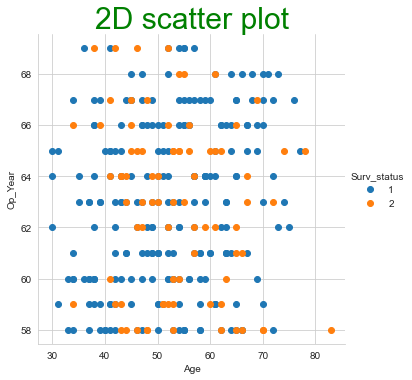

In [59]:
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
# IMPORT WARNINGS TO IGNORE THE UNNECESSARY WARNINGS
warnings.filterwarnings("ignore") 
sb.set_style("whitegrid")
sb.FacetGrid(hbd,hue="Surv_status",size=5).map(plt.scatter,"Age","Op_Year").add_legend();
plt.title("2D scatter plot",fontsize=30,color="green")
plt.show()

# It's hard to classifie on the basis of "Age" and "Op_Year"

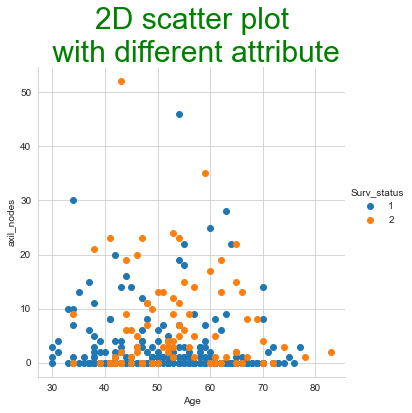

In [79]:
sb.set_style("whitegrid")
sb.FacetGrid(hbd,hue="Surv_status",size=5).map(plt.scatter,"Age","axil_nodes").add_legend();
plt.title("2D scatter plot\n with different attribute",fontsize=30,color="green")
plt.show()
# There is no clear cluster to separate them

### Observation:

1. hard to separate on the basis of "Age","Op_Year" and "axil_nodes"
2. no clear cluster to separate

# Pair-plot

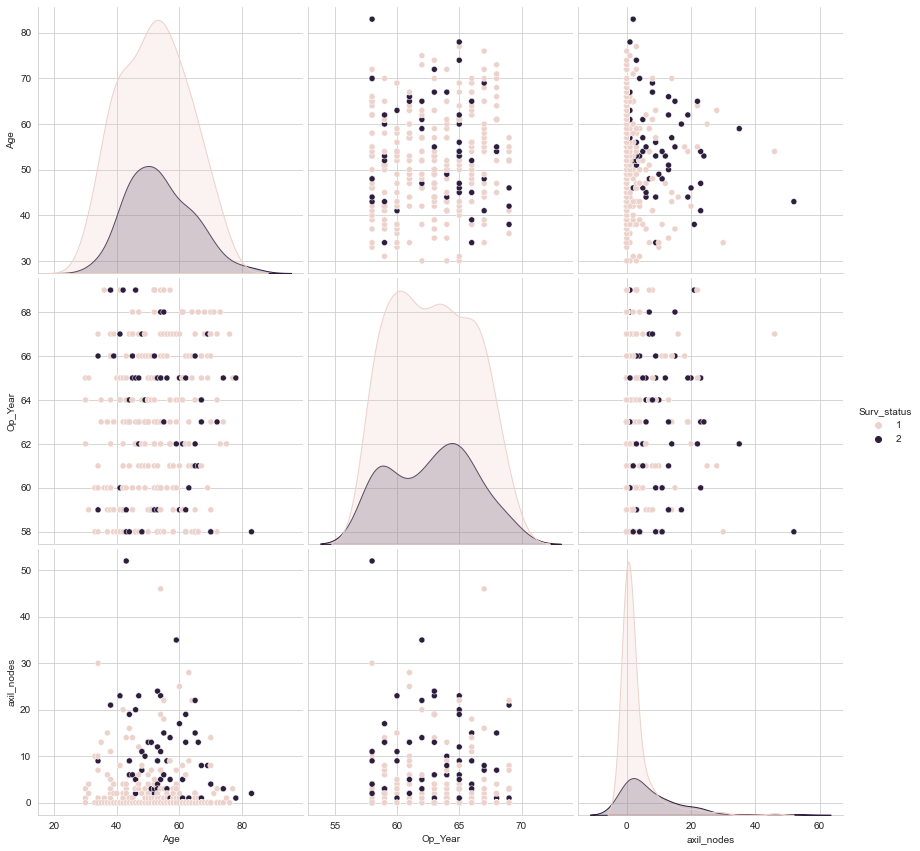

In [78]:
#hbd["Surv_status"] = hbd["Surv_status"].apply(lambda x: "Positive" if x==1 else "Negative")
plt.close()
# TO PRINT THE PAIRPLOT BY HELP OF SEABORN MODULE
sb.pairplot(hbd,hue="Surv_status",vars=['Age', 'Op_Year', 'axil_nodes'], size=4)
plt.show()

### Observation:

1. Based on "Age" and "Op_Year", the two classes are highly overlapped.
2. Classification is hard using pair-plot
3. Class "Surv_status" is no use to find cluster

## Objective:

Performing Univaraite analysis on Haberman dataset

## Histogram

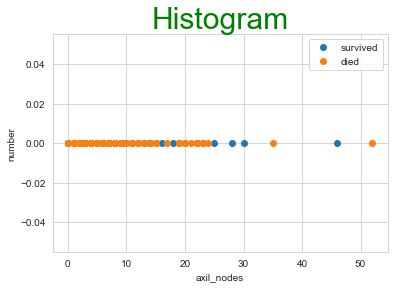

In [61]:
import numpy as np
# ALL 'Surv_status' WHICH HAS VALUE '1' STORED IN 'hbd_survived'
hbd_survived = hbd.loc[hbd["Surv_status"] == 1];
# ALL 'Surv_status' WHICH HAS VALUE '2' STORED IN 'hbd_died'
hbd_died = hbd.loc[hbd["Surv_status"] == 2];

plt.plot(hbd_survived["axil_nodes"], np.zeros_like(hbd_survived["axil_nodes"]), "o",label="survived")
plt.plot(hbd_died["axil_nodes"], np.zeros_like(hbd_died["axil_nodes"]), "o",label="died")

plt.title("Histogram",fontsize=30,color="green")
plt.xlabel("axil_nodes")
plt.ylabel("number")

plt.legend()

plt.show()

### PDF 

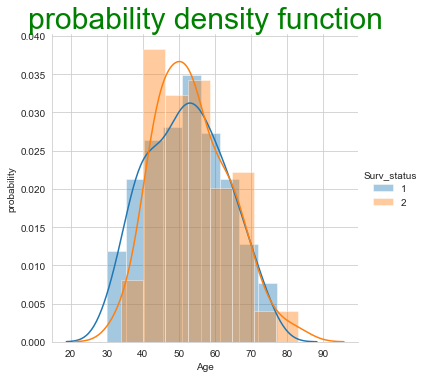

In [80]:
#PROBABILITY DENSITY FUNCTION ON THE BASIS OF 'Age'
sb.FacetGrid(hbd,hue="Surv_status",size=5).map(sb.distplot,"Age").add_legend()
plt.ylabel("probability")
plt.title("probability density function",fontsize=30,color="green")

plt.show()


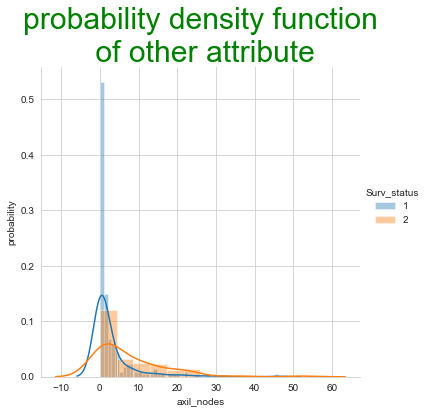

In [73]:
#PROBABILITY DENSITY FUNCTION ON THE BASIS OF 'axil_nodes'
sb.FacetGrid(hbd,hue="Surv_status",size=5).map(sb.distplot,"axil_nodes").add_legend()
plt.ylabel("probability")
plt.title("probability density function\n of other attribute",fontsize=30,color="green")
plt.show()


### Observation:

1. based on "Age", the "surv_status" is high for 2
2. based on "axil_nodes" the probability density function is low for "Surv_status" = 2

## CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


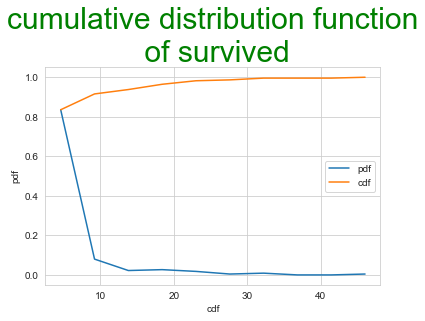

In [74]:
counts, bin_edges = np.histogram(hbd_survived["axil_nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf");
plt.plot(bin_edges[1:], cdf,label="cdf")
plt.legend()
plt.title("cumulative distribution function\n of survived",fontsize=30,color="green")
plt.ylabel("pdf")
plt.xlabel("cdf")

plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


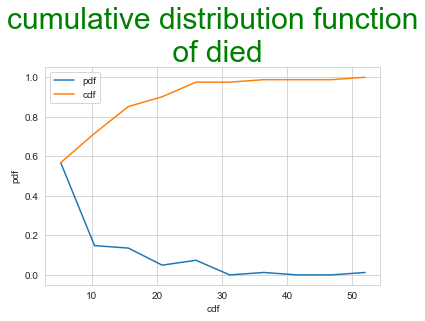

In [76]:
counts, bin_edges = np.histogram(hbd_died["axil_nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf");
plt.plot(bin_edges[1:], cdf,label="cdf")
plt.legend()

plt.ylabel("pdf")
plt.xlabel("cdf")
plt.title("cumulative distribution function\n of died",fontsize=30,color="green")
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


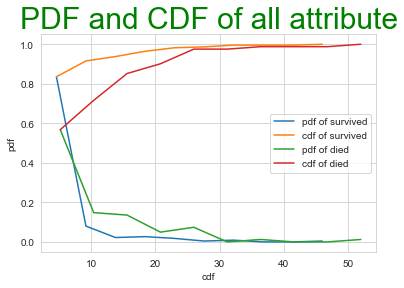

In [69]:
counts, bin_edges = np.histogram(hbd_survived["axil_nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of survived");
plt.plot(bin_edges[1:], cdf,label="cdf of survived")
plt.legend()


counts, bin_edges = np.histogram(hbd_died["axil_nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of died")
plt.plot(bin_edges[1:], cdf,label="cdf of died")
plt.legend()
plt.title("PDF and CDF of all attribute",fontsize=30,color="green")
plt.ylabel("pdf")
plt.xlabel("cdf")

plt.show();

### Observation:

1. On the basis of CDF if "axil_nodes" are less then 5 , there's 82% chance of survival
2. It's 58% chance that it belongs to "Surv_status" class 2

# Box-plot and Whiskers

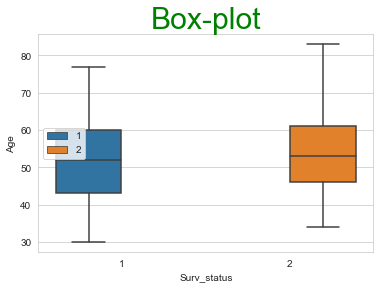

In [70]:
sb.boxplot(x="Surv_status",y="Age",hue="Surv_status",data=hbd)
plt.title("Box-plot",fontsize=30,color="green")
plt.legend()
plt.show()

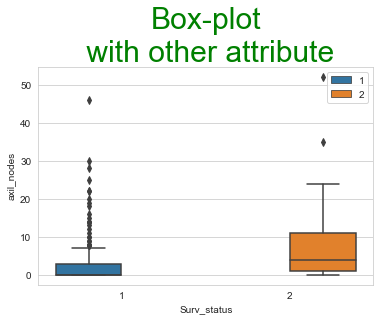

In [77]:
sb.boxplot(x="Surv_status",y="axil_nodes",hue="Surv_status",data=hbd)
plt.title("Box-plot\n with other attribute",fontsize=30,color="green")
plt.legend()
plt.show()

### Observation:

1. It is in "Surv_status" class 2 when "Age" is greater than 60
2. if "axil_nodes" are less than 5 it belongs to class 1

# Violin-plot

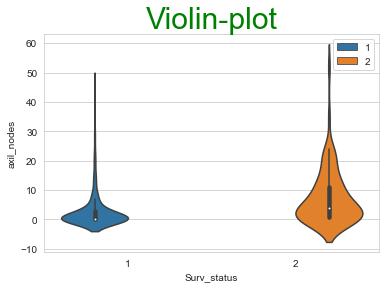

In [72]:
sb.violinplot(x="Surv_status",y="axil_nodes",hue="Surv_status",data=hbd)
plt.title("Violin-plot",fontsize=30,color="green")
plt.legend()
plt.show()

# Summarizing plots in english

1. It's hard to classifie, based on 3 classes
2. Survival rate is more when "axil_nodes" are between ) 0 to 8
3. based on boxplot, if "Age" is greater than 60 it belongs to "Surv_status" class 2 